In [7]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import shdom
from mpl_toolkits.mplot3d import Axes3D

data_dir = 'AirMSPI_ER2_GRP_ELLIPSOID_20130206_Pacific-32N123W'

In [8]:
shdom.AirMSPIMeasurementsv3().imshow(data_dir)

<IPython.core.display.Javascript object>

In [9]:
# roi = []

In [10]:
%matplotlib notebook 
# for i in range(i,9):
#     roi.append(shdom.AirMSPIMeasurementsv3().select_region_of_interest(data_dir,i))

In [11]:
# print(roi)

In [12]:
roi = [[1552, 2072, 780, 1288], [1644, 2108, 864, 1308], [1696, 2176, 916, 1376], [1740, 2196, 936, 1400], [1840, 2108, 1040, 1432], [1884, 2160, 1064, 1500], [1944, 2316, 1116, 1540], [1972, 2480, 1136, 1600], [2052, 2544, 1204, 1640]]
# roi = [[1552, 2072, 780, 1288],  [1552, 2072, 780, 1288]]


airmspi_measurements = shdom.AirMSPIMeasurementsv3()
airmspi_measurements.load_from_hdf(data_dir,region_of_interest=roi,valid_wavelength=[660])


In [20]:
output_dir = '../Develop_Dynamic_cloud/experiments/AirMSPI_test/dynamic_medium_polychromatic'

airmspi_measurements.save_airmspi_measurements(output_dir)

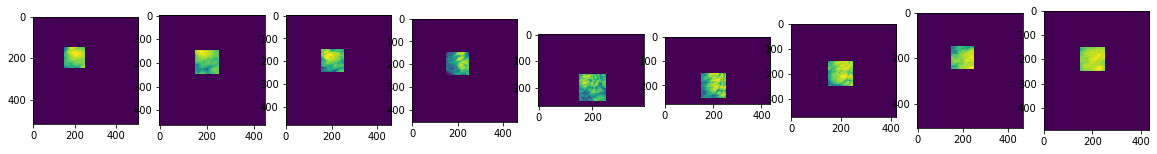

In [19]:
%matplotlib inline
f, axarr = plt.subplots(1, len(airmspi_measurements.images), figsize=(20, 20))
if isinstance(axarr,plt.Axes):
    axarr = [axarr]
for ax, image in zip(axarr, airmspi_measurements.images):
    if len(image.shape)>2 and image.shape[2]==2:
        image = np.concatenate((np.zeros((200,200,1)),image),2)
    # image -= image.min()
    # ax.imshow(image/image.max())
    ax.imshow(image)

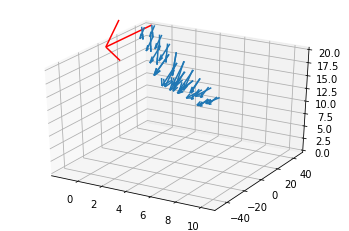

In [15]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init()
x_min = airmspi_measurements.camera.projection.x.min()
x_max = airmspi_measurements.camera.projection.x.max()
y_min = airmspi_measurements.camera.projection.y.min()
y_max = airmspi_measurements.camera.projection.y.max()
airmspi_measurements.plot(ax,[x_min, x_max],[y_min, y_max],[0, 20],5)

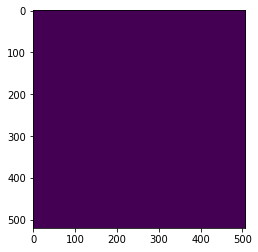

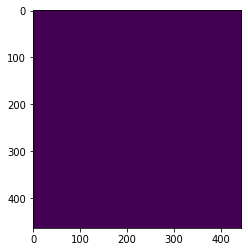

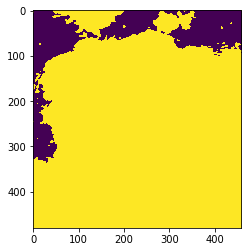

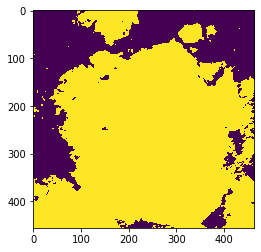

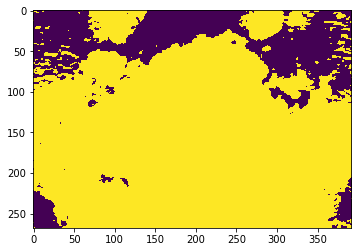

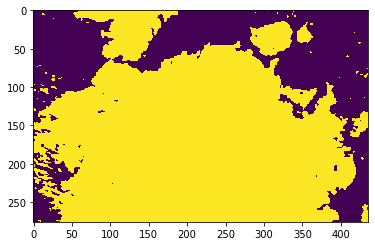

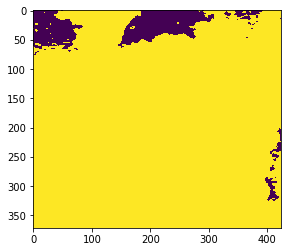

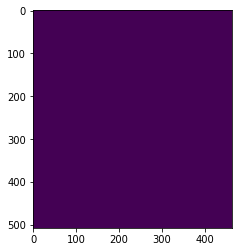

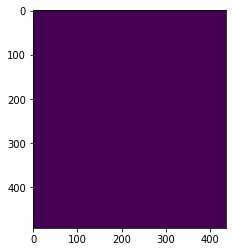

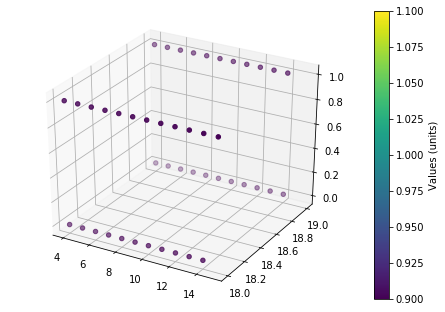

45


In [17]:
nx = ny = 40
x_min = airmspi_measurements.camera.projection.x.min()
x_max = airmspi_measurements.camera.projection.x.max()
dx = np.round((x_max-x_min)/nx,10)
x = np.arange(x_min,x_max,dx)

y_min = airmspi_measurements.camera.projection.y.min()
y_max = airmspi_measurements.camera.projection.y.max()
dy = np.round((y_max-y_min)/ny,10)
y = np.arange(y_min,y_max,dy)

grid = shdom.Grid(x=x,
                  y=y,z=np.linspace(0, 20, 20))

measurements = airmspi_measurements
dynamic_carver = shdom.DynamicSpaceCarver(airmspi_measurements)
mask_list, dynamic_grid, cloud_velocity = dynamic_carver.carve(grid, agreement=0.9,
                    time_list = measurements.time_list, thresholds=0.0175,
                    vx_max = 0, vy_max=0, gt_velocity = None)
show_mask=1
if show_mask:
    a = (mask_list[0].data)
    shdom.cloud_plot(a)
    print(sum(sum(sum(a))))


In [18]:
for ind,im in enumerate(airmspi_measurements.images):
    mask = np.ones(im.shape) * im.min()
    mask[150:250,150:250] = im[150:250,150:250]
    airmspi_measurements._images[ind] = mask